In [1]:
import pandas
import os
from IPython.display import Image

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Устанавливаем глобальный seed для всех случайностей
np.random.seed(42)

# Введение в генеративное моделирование

### Структура работы генеративной модели
___Генеративная модель___ оценивает __p(x)__ — вероятность получения наблюдения x.

![title](images/generationpipe.png)

### Прогресс в генерации лиц

![title](images/progress.png)

## Основы генеративного моделирования

Набор точек __X__ сгенерирован правилом _Pdata_.

Возьмите на себя роль генеративной модели). Выбереnt точку _(x1, x2)_ чтобы она принадлежала расрпеделению _Pdata_.



![title](images/pdata.png)

* Точка А нарушает правило 1 базовых принципов генеративного моделирования — ясно видно, что она не принадлежит распределению pdata, поскольку находится посреди моря.

* Точка B настолько близко расположена от точки из исходного набора данных, что мы не впечатлены способностью модели создать такую точку. Если все образцы, сгенерированные моделью, будут расположены так же близко к точкам из исходного набора, то это можно считать нарушением правила 2 базовых принципов генеративного моделирования.

* Точку C можно рассматривать как успех, потому что она вполне могла быть получена из распределения pdata и существенно отличается от всех точек в исходном наборе.

![title](images/gtdata.png)

# Генеративная модель

На примере с картой мира мы побывали в роли генеративной модели.

Еще раз рассмотрим как работает генеративная модель.

![image](images/source_of_data.png)

У нас есть некоторый источник порождающий данные $X^{data}$.

$Х^{data}$ - это случайная величина.
Случайная, т.е. есть Неопределенность. Мы не знаем какое значение будет получено следующим.

Для нас Источник данных это "черная коробочка" или "таинственный сундук".

Как он устроен внутри неизвестно.

Неизвестно статистическое распределение $P_{data}$ (или вероятностная модель) согласно которой генерируются эти данные $X^{data}$.

В целом распределения $P_{data}$ у Источника может и не быть, но в задаче генеративного моделирования мы полагаем, что оно есть.

Мы наблюдали за Источником, и собрали некоторую выборку $X^{data}$ из экспериментальных данных $X^{data}=\left\lbrace X_1^{data}, X_2^{data},X_3^{data}, ...,\right\rbrace$ , размером $n$.

Пока мы рассматриваем одномерную случайную величину $X^{data}$  , она является действительным числом.
Отобразим все значения выборки $Х^{data}$ на Оси $Х$.

![image](images/generative_model.png)

**Генеративная модель:**
* принимает в себя экспериментальную выборку значений $Х^{data}$
* моделирует статистическое распределение наших данных на основе значений $Х^{data}$

Она "подбирает" статистическое распределение $P_{model}(Х)$, которое по ее мнению лучшим образом описывает процесс генерации данных.
Имея распределение $P_{model}(Х)$, мы можем генерировать новые образцы данных $X^{model}$, но уже из этого распределения.

Мы хотим, чтобы:
* Сгенерированные ей образы $X^{model}$ были похожими на образцы $X^{data}$.

Чем больше $P_{model}(Х)$ походит на $P_{data}(X)$, тем больше образцы $X^{model}$ будут походить на образцы $X^{data}$.

* Модель генерировала новые образцы, отличающиеся от тех, что были в обучающей выборке $X$.

А не просто запомнила, нашу выборку и отдавала значения из нее.

# Теория вероятностей

В контексте генеративных моделей мы остановимся на том, что `Теория вероятности`:

* Изучает случайные события
* Моделирует случайные события с помощью статистических распределений (моделей) с некоторыми параметрами

Для генерации чисел мы можем использовать распределения из Теории вероятностей.

Например, такие как на рисунке ниже.

![image](images/continious_and_discrete_distributions.jpg)

Отметим, что случайные величины бывают дискретными и непрерывными (см. рисунок ниже).

Дискретная случ. величина - принимает конечное или счетное множество значений.
- **Пример:** Количество очков, выпавших при броске игральной кости.

Непрерывная случ. величина - принимает любые значения из некоторого непрерывного интервала.
* **Пример:** Нормированная координата по высоте экрана смартфона, куда пользователь тапнет пальцем.

`Пространство элементарных событий` — множество $\Omega$ всех возможных исходов случайного эксперимента. 

Будем обозначать $e_i$ - возможный исход эксперимента.

**Пространства событий:**
* у дискретной величины это конечное/счетное множество возможных исходов
* у непрерывной - непрерывный отрезок

**Подход к определению вероятности тоже разный:**
* для непрерывной случайной величины задана **Функция плотности вероятности (Probability density function,  сокр. `PDF` )**

`PDF` - это функция $f(x)$, которая определяет вероятность того, что непрерывная случайная величина $X$ примет значение в бесконечно малом интервале $\left[x,x+dx\right]$.

* для дискретной случайной величины задана **Функция вероятности (Probability mass function сокр. `PMF` )**

В англоязычном термине подчеркивается ее противоположность `плотности` вероятности в виде `массы` вероятности.

`PMF` - это функция $f(x)$, возвращающая вероятность $P$ того, что дискретная случайная величина $x$ примет определённое значение.

![image](images/random_variables.png)

Принципиальная разница(см. рисунок ниже) в том, что
* при дискретной случ. величине вероятность определяется для опр. исхода (появление 4-очков на игральной кости)
* для непрерывной случ. величины определяется вероятность попасть в интервал возможных значений величины Х( тапнуть в нижнюю часть экрана смартфона, нормированная координата по высоте от 0 до 0.5).

Как мы видим, вероятность появления, конкретного значения $Х=a$ для непрерывной величины (в точке) равна 0, потому, что длинна отрезка $[a,a]$, равна 0.

Здесь приведены примеры и свойства для:
* функции плотности вероятности `PDF`
* функции вероятности `PMF`

![image](images/pdf_and_pmf.png)

Функция плотности вероятности (`PDF`) - обычно представлена непрерывной функций в виде аналитической формулы с параметрами распределения.

Свойства:
* Значения $PDF(X=x) \ge 0$
* Интеграл по области определения $\int_{A}^{B}PDF(x)\,\mathrm{d}x=1$

Рассмотрим `PDF` и ее свойства на модели нормального распределения $Norm(\mu, \sigma ^{2})$.

## Распределения непрерывной случайной величины

### Нормальное распределение $Norm(\mu, \sigma ^{2})$

Модель нормального распределения $Norm(\mu, \sigma ^{2})$ с параметрами:
* $\mu$ — `математическое ожидание` (`первый момент случайной величины`), а так же `медиана` и единственная `мода`.

Свойства: Центр симметрии распределения, точка максимума `PDF`.

* $\sigma ^{2}$ — `дисперсия` (`второй момент случайной величины`). Корнем из нее будет параметр $\sigma$ - `среднеквадратичное отклонение`.

Свойства: Определяет ширину и высоту кривой `PDF`. Чем больше $\sigma$, тем шире и ниже кривая `PDF`.

> Зафиксировав значения параметров $Norm(\mu, \sigma ^{2})$ распределения $$\theta=\left\lbrace\mu=0,\sigma=1\right\rbrace$$ мы получаем точный статистический закон описывающий вероятностный процесс генерации всех наших данных, -  функцию плотности вероятности `PDF`) для непрерывной случ. величины.

#### Probability Mass Function

Функция плотности вероятности (`PDF`) для нормального распределения:

$$Norm(\mu, \sigma ^{2})={\frac{1}{\sqrt{2\;\pi\sigma^{2}}}}\cdot e^{-\;{\frac{(x-\mu)^{2}}{2\sigma^{2}}}}$$

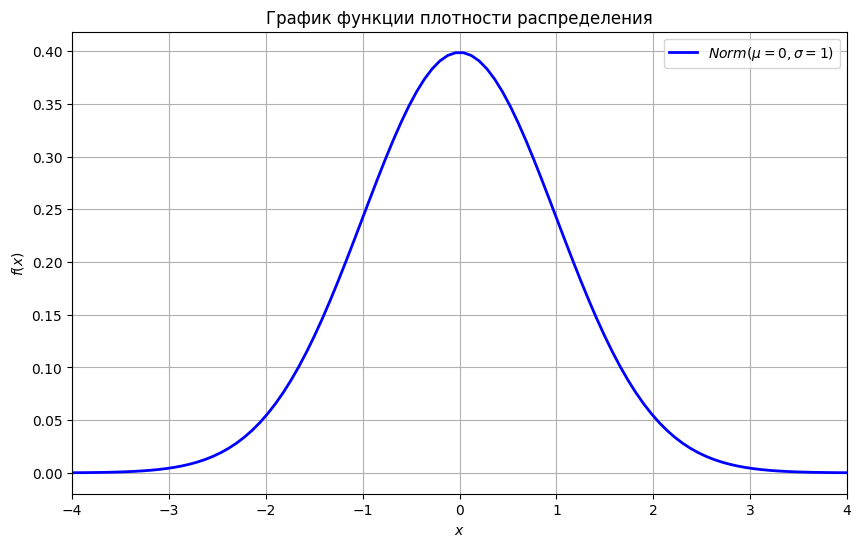

In [46]:
norm_distr_mu = 0 # математическое ожидание
norm_distr_sigma = 1 # среднеквадратичное отклонение

#Демо свойств:
# norm_distr_mu = 2
# norm_distr_sigma = 1

# norm_distr_mu = 0
# norm_distr_sigma = 3

# norm_distr_mu = 0
# norm_distr_sigma = 0.2

# Создание объекта нормального распределения
normal_dist = stats.norm(loc=norm_distr_mu, scale=norm_distr_sigma)

x = np.linspace(-4, 4, 100)
y = normal_dist.pdf(x)

# Построение графика функции плотности распределения
plt.figure(figsize=(10, 6))
plt.plot(
    x, y, "b-", lw=2, label=f"$Norm(\mu={norm_distr_mu}, \sigma={norm_distr_sigma})$"
)

# Добавление дополнительных элементов
plt.title("График функции плотности распределения")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.grid(True)
plt.legend()

# Задание диапазонов для обеих осей
plt.xlim(-4, 4)

plt.show()

**Ключевой момент:**
* вероятность, что непрерывная случайная величина примет значение $x\in\left\lbrack a,b\right\rbrack$ равна
$$ P(x\in[a,b])=\int_a^bf(x)\,\mathrm{d}x $$

Отобразим вероятность $P(x\in[a, b])$ на графике `pdf` имеющегося нормального распределения $Norm(\mu=0, \sigma=1)$.

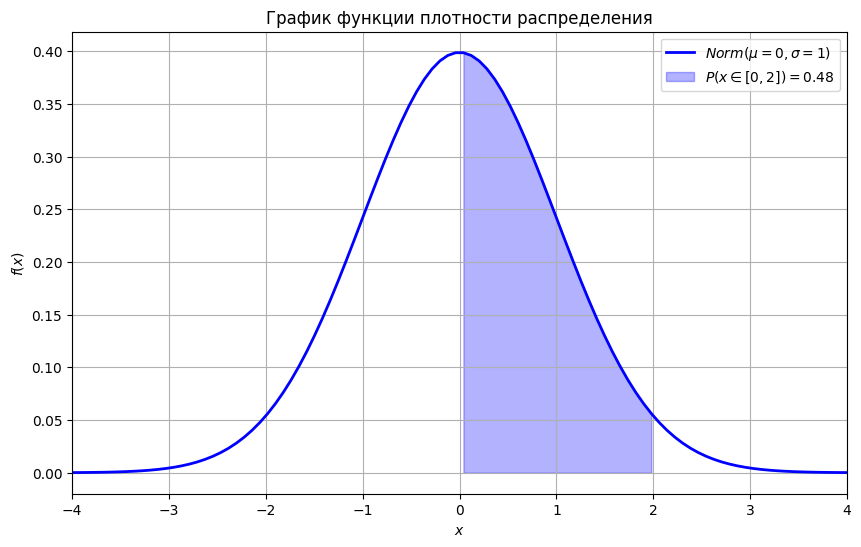

In [45]:
# Построим график нормального распределения
plt.figure(figsize=(10, 6))
plt.plot(x, y, "b-", lw=2, label=f"$Norm(\mu={norm_distr_mu}, \sigma={norm_distr_sigma})$")

# Определим границы области интегрирования для расчета вероятности
a = 0
b = 2

#Демо свойств:
# a = -1
# b = 1

# a = 1
# b = 1

# a = -4
# b = 4

# Вычисление вероятности попадания в интервал от -1 до 1
probability = normal_dist.cdf(b) - normal_dist.cdf(a)

# Закрашивание области интегрирования соответствующей значению вероятности
plt.fill_between(
    x,
    y,
    where=(x >= a) & (x <= b),
    color="blue",
    alpha=0.3,
    label=f"$P(x\in[{a}, {b}]) = {probability:.2f}$",
)

# Настройка графика
plt.legend()
plt.title("График функции плотности распределения")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.grid(True)

# Задание диапазонов для обеих осей
plt.xlim(-4, 4)

plt.show()

#### Генерация выборки из распределения

In [31]:
# Генерация 8 случайных чисел с нормальным распределением
normal_numbers = stats.norm.rvs(loc=norm_distr_mu,
                                  scale=norm_distr_sigma,
                                  size=8)

# Вывод результатов
print(normal_numbers)

[-0.46947439  0.54256004 -0.46341769 -0.46572975  0.24196227 -1.91328024
 -1.72491783 -0.56228753]


## Распределения дискретной случайной величины

### Категориальное распределение $Cat(p_d)$

![image](images/categorical_distribution.png)

В схеме `эксперимента с d-исходами` мы рассматриваем 1 эксперимент и вероятности происхождения всех элементарных исходов $$\Omega=\left\lbrace e_1, e_2, e_3, ..., e_d \right\rbrace$$

`Пространство элементарных событий`:
$$\Omega=\left\lbrace 0, 1, 2 \right\rbrace$$

Поскольку сейчас мы работаем в области теории вероятностей мы знаем, что внутри источника, генерирующего последовательность, находится модель `Категориального распределения` $Cat(p_d)$ c параметром:
   * $p_d$ - который представляет собой вектор вероятностей размерности $d$ для наступления каждого из элементарных исходов отдельного эксперимента.

В нашем случае, у нас 3 возможных исхода: `'0', '1', '2'`, и $d=3$.

$p_{d=3}=[p_0, p_1, p_2]$:

где
* $p_0$ - вероятность наступления события `'0'`
* $p_1$ - вероятность наступления события `'1'`
* $p_2$ - вероятность наступления события `'2'`

Поскольку это все возможные исходы эксперимента:
$$\underset{i}{\overset{d}{\sum}}p_i=1$$

Так как мы работаем в теории вероятностей, мы знаем точные значения этих вероятностей:

> Зафиксировав параметр $Cat(p_d)$ распределения $$\theta=\left\lbrace p_d=[0.5, 0.3, 0.2] \right\rbrace$$ мы получаем точный статистический закон описывающий вероятностный процесс генерации всех наших данных, - `функцию вероятностей` дискретного распределения.

#### Probability Mass Function

`Функция вероятности(Probability Mass Function)` - функция $f(x_i)$, возвращающая вероятность $P$ того, что дискретная случайная величина 
$x$ примет определённое значение $x_i$.

Для нашего распределения $Cat(p_d)$:

$$f\left(x_i\right)=Cat\left(p_d \mid x=x_i \right)=P\left(x=x_i\right)=p_i$$

при $x_i \in \Omega=\left\lbrace e_1, e_2, e_3, ..., e_d \right\rbrace$

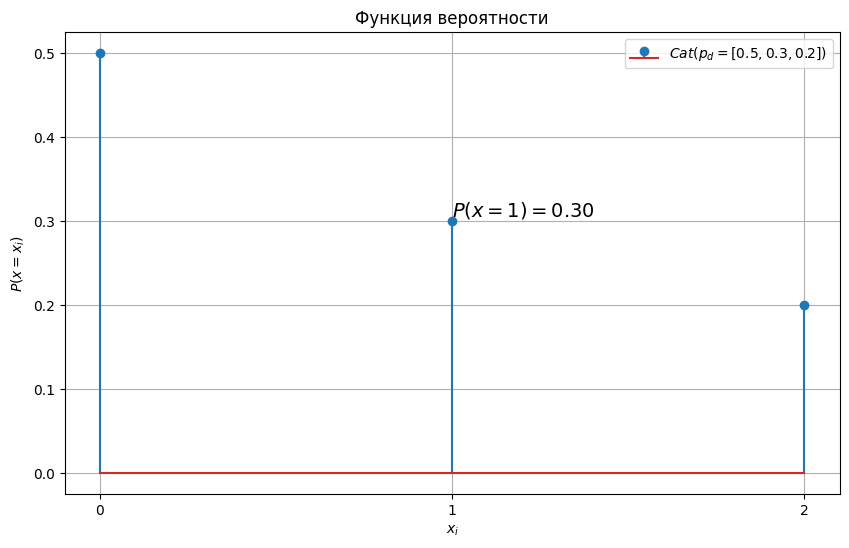

In [3]:
# готового варианта для Categorical Distribution не нашел написал свой вариант =)
from categorical_distribution import CategoricalDistribution

# Параметры распределения
pd = [0.5, 0.3, 0.2]
values = [0, 1, 2]

# частный случай дискретное равномерное распределение
# pd = [0.2, 0.2, 0.2, 0.2, 0.2]
# values = [0, 1, 2, 3, 4]

# значение k для которого хотим подписать вероятность на графике
x_i = 1

# Вычисляем функцию вероятностей (pmf)
cat_dist = CategoricalDistribution(values=values, pd=pd)
x = np.array(values)
y = cat_dist.pmf(x)

# Построение графика функции вероятности
fig, ax = plt.subplots(figsize=(10, 6))
ax.stem(x, y, label=f"$Cat(p_d={pd})$")
ax.set_xticks(x)

# Подпишем вероятности на графике
ax.text(
    x[x_i],
    y[x_i],
    f"$P(x={x[x_i]})={y[x_i]:.2f}$",
    verticalalignment="bottom",
    horizontalalignment="left",
    fontsize=14,
)

# Добавление дополнительных элементов
plt.title(f"Функция вероятности")
plt.xlabel("$x_i$")
plt.ylabel("$P(x=x_i)$")
plt.grid(True)
plt.legend()
plt.show()

**Ключевой момент:**
* Вероятность, что дискретная случайная величина ($x$) примет конкретное значение ($a$) равна значению функции вероятности $f(x)$ для этой точки:
 $$ P(x=a)=f(x=a)$$

#### Генерация выборки из распределения

In [4]:
sample_size = 8  # количество чисел для генерации

# Генерируем последовательность из 8 элементов
sequence = np.random.choice(values, p=pd, size=sample_size)
print(sequence)

[0 2 1 1 0 0 0 2]


### Распределение Бернулли $Bern(p)$

![images](images/bernulli_distribution.png)

Поскольку сейчас мы работаем в области теории вероятностей мы знаем, что внутри источника, генерирующего выборку находится модель распределения Бернулли $Bern(p)$ c параметром:
   * $p$ - вероятность успеха.

В схеме эксперимента Бернулли мы рассматриваем 1 эксперимент и вероятность происхождения некоторого интересного нам события. Например, например вероятность того, что персонаж компьютерной игры откроет сундук отмычкой:

* 1 - будем связывать с происхождением некоторого интересного нам события (`сундук открыт`). Событие называется "успех."
  
  Вероятность этого события обозначим $p=P(x=1)$

* 0 - будем связывать с тем, что данное событие не случилось (`сундук закрыт`). Событие называется "неудача."
  
  Вероятность этого события обозначим $q=P(x=0)$ и $q=1-p$.

`Пространство элементарных событий` для распределения Бернулли:
$$\Omega=\left\lbrace 0, 1 \right\rbrace$$

> Зафиксировав значение параметра $Bern(p)$ распределения $$\theta=\left\lbrace p=0.3\right\rbrace$$ мы получаем точный статистический закон описывающий вероятностный процесс генерации всех наших данных, - `функцию вероятностей` дискретного распределения.



#### Probability Mass Function

`Функция вероятности(Probability Mass Function)` - функция, возвращающая вероятность $P$ того, что дискретная случайная величина 
$x$ примет определённое значение:

$$f\left(x_i\right)=P\left(x=x_i\right)$$

Для нашего распределения $Bern(p)$:

$$Bern\left(p \mid x=a \right)=\left\lbrace
\begin{array}{llllllllll}
	p   & ,x=1                                  \\
	1-p & ,x=0                                  \\
\end{array}\right\rbrace$$

при $a \in \left\lbrace0,1\right\rbrace$

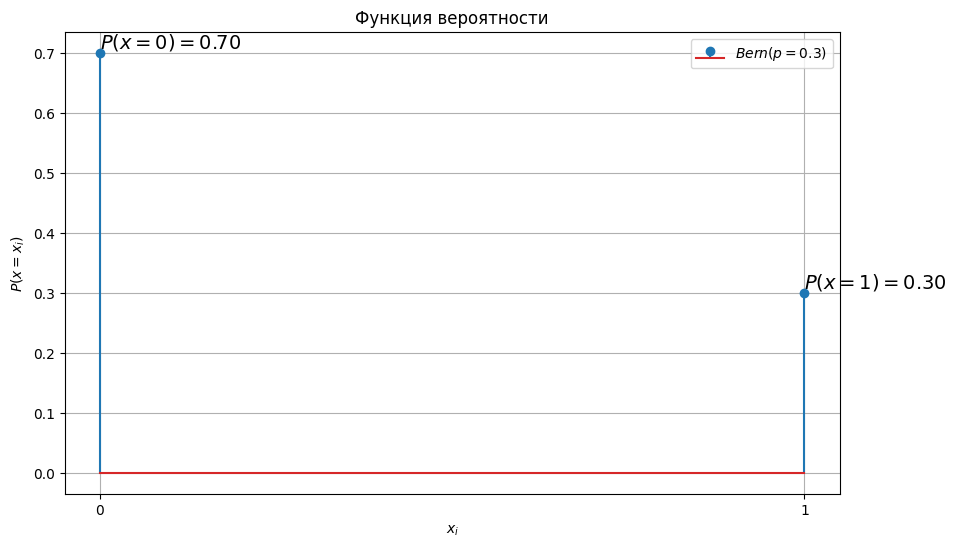

In [17]:
# Параметры распределения
p = 0.3

x = np.arange(0, 1 + 1)
y = stats.bernoulli.pmf(x, p=p)

# Построение графика функции вероятности
fig, ax = plt.subplots(figsize=(10, 6))
ax.stem(x, y, label=f"$Bern(p={p})$")
ax.set_xticks(x)

# Подпишем вероятности на графике
ax.text(
    0,
    1-p,
    f"$P(x={0})={1-p:.2f}$",
    verticalalignment="bottom",
    horizontalalignment="left",
    fontsize=14,
)

ax.text(
    1,
    p,
    f"$P(x={1})={p:.2f}$",
    verticalalignment="bottom",
    horizontalalignment="left",
    fontsize=14,
)

# Добавление дополнительных элементов
plt.title(f"Функция вероятности")
plt.xlabel("$x_i$")
plt.ylabel("$P(x=x_i)$")
plt.grid(True)
plt.legend()
plt.show()

#### Генерация выборки из распределения

In [22]:
# результат работы двух функций идентичен
def bernoulli_np(p, n=1):
    return np.random.choice([0, 1], size=n, p=[1 - p, p])


def bernoulli_stats(p, n=1):
    return stats.bernoulli(p).rvs(size=n)

sample_size = 8  # Количество чисел для генерации

bernoulli_numbers = bernoulli_np(p, sample_size)
print(bernoulli_numbers)

[1 0 0 1 1 0 1 0]


### Биномиальное распределение $Binom(p, n)$

![image](images/binomial_distribution.png)

И так у нас есть некоторый источник данных (случайная величина $x^{Bern}$), генерирующих последовательность $\left\lbrace x^{Bern}_1, x^{Bern}_2, x^{Bern}_3, ..., x^{Bern}_n\right\rbrace$:

```
[0 1 1 0 0 0 0 0 ... 1] (160 результатов от экспериментов Бернулли)
```

Поскольку сейчас мы работаем в области теории вероятностей мы знаем, что внутри источника, генерирующего эту последовательность,

находится модель распределения Бернулли $Bern(p)$ c параметром:
   * $p$ - вероятность успеха.

`Биномиальное распределение` является обобщением `распределения Бернулли` на серию экспериментов $n$.

Мы так же проводим `эксперимент Бернулли` с двумя возможными исходами "успех" и "неудача". Например, мы случайно выбираем одного жителя нашего города, и хотим узнать вероятность, того, что у него(нее) волосы рыжего цвета.

> Если у нас есть серия экспериментов Бернулли, в рамках распределения Бернулли, мы задаемся вопросом о том, какова вероятность получить "успех", при проведении нового 1-го независимого эксперимента.

При `Биномиальном распределении` мы проводим серию из $n$ экспериментов Бернулли и нас интересует вероятность появления числа "успехов" $k$ в такой серии экспериментов.

Например, мы хотим случайно выбирать $n=20$ сундуков, и узнать вероятность, того, что $k=7$ из них будут успешно открыты ($p=0.3$). Такое событие обозначим как $A_{p=0.3, n=20, k=7}$. Это событие соответствует числу $7$.

И так мы берем нашу выборку $x^{Bern}$ из 160 элементов, делим ее на серии экспериментов по $n=20$, и в рамках каждой серии из 20 экспериментов считаем число успехов $k$ ($x==1$). Так мы получаем уже новую дискретную случайную величину $x^{Binom}=\left\lbrace x^{Binom}_1, x^{Binom}_2, x^{Binom}_3, ..., x^{Binom}_m\right\rbrace$ из 8 чисел:

```
[7 5 6 4 5 5 6 8]
```

Модель Биномиального распределения $Binom(p, n)$ описывается параметрами:
   * $p$ - вероятность успеха в отдельном эксперименте Бернулли.
   * $n$ - количество экспериментов Бернулли в одной серии экспериментов.

> Заметим, что $Binom(p, n=1)=Bern(p)$ `биномиальное распределение` при серии экспериментов состоящей из 1-го эксперимента, сводится к `распределению Бернулли`. 

Таким образом, `распределение Бернулли`, частный случай `Биномиального распределения`.

Число "успехов" для случайной величины $x^{Binom}$ может варьироваться от $0$ до $n$.

`Пространство элементарных событий` для случайной величины $x^{Binom}$:
$$\Omega=\left\lbrace 0, 1, ..., n \right\rbrace$$

Вероятность события $A_{p=0.3, n=20, k=7}$ обозначим $P(A_{p=0.3, n=20, k=7})=P(p=0.3, n=20, k=7)$.

Параметры $p$ и $n$ однозначно определяют вид `функции вероятностей` $f(p, n, k=x^{Binom}_i)$ биномиального распределения $Binom(p, n)$.

> Заметим, что `функция вероятности` $f(x^{Binom})$ строится на значениях, которые может принимать случайная величина $x^{Binom}$. Для простоты пишут просто $f(x)$, подразумевая $f(x^{Binom})$. Для краткости вместо $k=x^{Binom}_i$ будем писать $x=x_i$.

> Зафиксировав значение параметров $$\theta=\left\lbrace p=0.3, n=20 \right\rbrace$$ биномиального распределения $Binom(p, n)$ мы получаем точный статистический закон описывающий вероятностный процесс генерации всех наших данных - `функцию вероятностей` дискретного распределения.

Запишем сокращенную запись вероятности события:

$$P(p=0.3, n=20, k=7)=f(p=0.3, n=20, x=x_i)=f_{\theta}(x=x_i)=P_{\theta}(x=x_i)$$

#### Probability Mass Function

`Функция вероятности(probability function)` для нашего распределения $Binom(p, n)$:

$$P_{\theta}(x=x_i)=Binom(p, n \mid x=x_i) = f(p,n, x=x_i)=\frac{n!}{k!\left(n-k\right)!}p^k(1-p)^{n-k}$$

при $x_i \in \Omega=\left\lbrace 0, 1, ..., n \right\rbrace$.

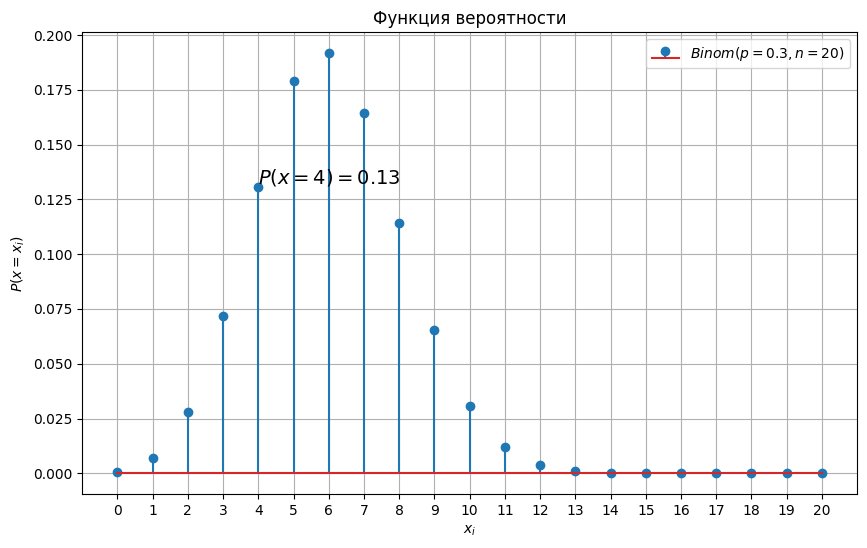

In [28]:
# Параметры Биномиального распределения
p = 0.3
n = 20

# значение k для которого хотим подписать вероятность
x_i = 4

x = np.arange(0, n + 1)
y = stats.binom.pmf(x, n, p)

# Построение графика функции вероятности
fig, ax = plt.subplots(figsize=(10, 6))
ax.stem(x, y, label=f"$Binom(p={p}, n={n})$")
ax.set_xticks(x)

# Подпишем вероятности на графике
ax.text(
    x[x_i],
    y[x_i],
    f"$P(x={x[x_i]})={y[x_i]:.2f}$",
    verticalalignment="bottom",
    horizontalalignment="left",
    fontsize=14,
)

# Добавление дополнительных элементов
plt.title(f"Функция вероятности")
plt.xlabel("$x_i$")
plt.ylabel("$P(x=x_i)$")
plt.grid(True)
plt.legend()
plt.show()

#### Генерация выборки из распределения

In [29]:
sample_size = 8 # Количество чисел для генерации

binomial_numbers = stats.binom.rvs(n, p, size=sample_size)
print(binomial_numbers)

[9 5 5 7 4 3 5 4]


## Теория вероятности резюме

Все распределения из Теории вероятностей - простейшие модели генераторов чисел.

Каждая такая модель $P(x)$ имеет свой набор параметров $\theta$.

Задавая эти параметры, мы получаем точный статистический закон по которому генерируются объекты.

![image](images/parametric_models.jpg)

В теории вероятностей:

* мы работаем с математическими моделями, которые позволяют моделировать поведение случайных величин.
* мы всегда точно знаем какая модель случайной величины(распределение) генерирует данные.
* все сгенерированные значения подчиняются этому фундаментальному для них закону.

Теория вероятности дала нам множество моделей с параметрами для генерации объектов.

* Как же создать на их основе генеративную модель?

## Генератор стиля


Даны примеры популярных стилей жителей города N. Необходимо сделать генератор новых стилей для них.

![title](images/style.png)

Сделаем список различных элементов стиля:


In [6]:
styles = {
    'прическа':[
        'нет волос',
        'длинные в пучок',
        'длинные волнистые',
        'длинные прямые',
        'короткая волнистые',
        'короткая прямые',
        'короткая курчавые'
    ],
    'цвет волос':[
        'черный',
        'блонд',
        'каштановый',
        'пастельный розовый',
        'рыжий',
        'серебристо серый',
    ],
    'аксесуар':[
        'нет очков',
        'круглые очки',
        'солнцезащитные очки',
    ],
    'одежда':[
        'худи',
        'комбинезон',
        'футболка с круглым вырезом',
        'футболка с V-вырезом',
    ],
    'цвет одежды':[
        'черный',
        'синий',
        'серый',
        'зеленый',
        'оранжевый',
        'розовый',
        'красный',
        'белый'
    ],
}

In [7]:
param_counts = 1
for s in styles.values():
    param_counts *= len(s)
param_counts

4032

In [8]:
styles_count = {
    'прическа':[
        7,
        0,
        1,
        23,
        1,
        11,
        7
    ],
    'цвет волос':[
        7,
        6,
        2,
        3,
        8,
        24,
    ],
    'аксесуар':[
        11,
        22,
        17,
    ],
    'одежда':[
        7,
        18,
        19,
        6,
    ],
    'цвет одежды':[
        4,
        5,
        6,
        8,
        6,
        8,
        7,
        6
    ],
}

In [9]:
for k in styles_count.keys():
    summ = 0
    for s in styles_count[k]:
        summ += s
    print(k, summ)

прическа 50
цвет волос 50
аксесуар 50
одежда 50
цвет одежды 50


Реализуйте следующие модели:

### Полиномиальная модель

![title](images/polynom.png)

### Аддитивное сглаживание (MLE)

![title](images/MLE.png)

Подробные формулы для наивной байесовской модели с MLE:
![title](images/formla1.png)
![title](images/formula2.png)

### Полиномиальная модель с MLE для пикселей

![title](images/pixels.png)

![title](images/style2.png)

![title](images/pixgen.png)

Как думаете почему наивная байесовская модель плохо справилась с задачей?

#### Сложности генеративного моделирования

* Как модель может справиться с высокой условной взаимозависимостью признаков?

* Как модель может отыскать одну из крошечных пропорций, чтобы получить удовлетворительное наблюдение в многомерном выборочном пространстве?

## Скрытое представление

Набор образцов тортов:
    
![title](images/tort1.png)

А вот так выглядит скрытое представление всех возможных тортов:
![title](images/tort2.png)    

Опишите функцию __f__, если мин высота торта 5 у.е., мин радиус 3 у.е., макс высота торта 25 у.е., макс радиус 35 у.е.

И последний пример скрытого представления:
![title](images/latent.png)    